<b>STEP 1: Importing the Source Data<br/>
<b>STEP 2: Exploratory Data Analysis on the source data <br/>
<b>STEP 3: Feature Engineering<br/>
<b>STEP 4: Exporting the featured engineered data<br/>

In [277]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import os
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
import string
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestClassifier
import math
import lightgbm as lgb
from sklearn import tree
from sklearn import neighbors
import math
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
from xgboost import XGBClassifier
from sklearn import model_selection
from datetime import datetime

In [278]:
random.seed(753423)

Importing a dataset

In [279]:
kickstarter_data = pd.read_excel('C:/Sapna/Graham/Data Mining/Project/Kickstarter/Datasets/test/Processed data/Web_Kaggle_Data_2015_2020_v2.xlsx')

In [280]:
print(kickstarter_data.nunique())

Obs_No                464240
id                    464224
name                  460519
backers_count           4695
category_name            160
main_category_name        30
country                   23
currency                  14
goal                    9887
state                      6
pledged                78947
usd_pledged           156444
created_date            3943
deadline_date           3939
state_changed_date      3882
launched_date           3940
Month_Yr                 238
Year                      13
source                     6
usd_pledged_real      158191
usd_goal_real         112317
Month                     12
dtype: int64


In [281]:
#printing all summary of the kickstarter data
#this will give the dimensions of data set : (rows, columns)
print(kickstarter_data.shape)
#columns and data types
print(kickstarter_data.info())
#basic stats of columns
print(kickstarter_data.describe())
#number of unique values in all columns
print(kickstarter_data.nunique())

(464240, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464240 entries, 0 to 464239
Data columns (total 22 columns):
Obs_No                464240 non-null int64
id                    464240 non-null int64
name                  464184 non-null object
backers_count         464240 non-null int64
category_name         464240 non-null object
main_category_name    464240 non-null object
country               464240 non-null object
currency              464240 non-null object
goal                  464240 non-null float64
state                 464240 non-null object
pledged               464240 non-null float64
usd_pledged           460568 non-null float64
created_date          464240 non-null datetime64[ns]
deadline_date         464240 non-null datetime64[ns]
state_changed_date    464240 non-null datetime64[ns]
launched_date         464240 non-null datetime64[ns]
Month_Yr              464240 non-null object
Year                  464240 non-null int64
source                464240 non-nu

The above stats help us reaching the following conclusions:

the data is at ID level (unique of ID=number of rows)
The numerical data fields are: goal, pledged, backers, usd_pledged, usd_pledged_real,usd_goal_real

Understanding Variables in the Dataset
The dataset has 15 variablesincluding ID. SInce ID is the level of the dataset, we can set it as the index of the ata later. Variables like name, currency, deadline, launched date and country as self explanatory. Explanations of some key variables are as follows:

Main_Category: There are 15 main categories for the project. These main categories broadly classify projects based on topic and genre they belong to.

Category: Main Categories are further sub divided in categories to give more general idea of the project. For example, Main Category “Technology” has 15 categories like Gadgets, Web, Apps, Software etc. There are 159 total categories.

Goal: This is the goal amount which the company need to raise to start its project. The goal amount is important variable for company as if it is too high, the project may fail to raise that amount of money and be unsuccessful. If it is too low, then it may reach its goal soon and backers may not be interested to pledge more.

Pledged: This is amount raised by the company through its backers. On Kickstarter, if total amount pledged is lower than goal, then the project is unsuccessful and the start-up company doesn’t receive any fund. If pledged amount is more than the goal, the company is considered successful. The variable “usd pledged” is amount of money raised in US dollars.

Number of Backers: These are number of people who have supported the project by pledging some amount.

In [282]:
rslt_df = pd.DataFrame(kickstarter_data.loc[kickstarter_data['name'].isnull()])
print(rslt_df)
rslt_df.to_excel(r'C:\Sapna\Graham\Data Mining\Project\Kickstarter\Datasets\test\Processed data\MissinG_names.xlsx')

        Obs_No          id name  backers_count   category_name  \
2870      2871    13560944  NaN              0           Farms   
6764      6765    31918107  NaN            159            Rock   
8996      8997    42311032  NaN              2           Music   
17500    17501    81824068  NaN             21       Wearables   
38669    38670   179907929  NaN              2         Apparel   
43064    43065   200371338  NaN              0         Jewelry   
45956    45957   213685731  NaN            401       Wearables   
62565    62566   290486498  NaN              1            Apps   
63058    63059   292836707  NaN              0    Film & Video   
68879    68880   319867257  NaN             26         Fashion   
102472  102473   475022626  NaN             21          Crafts   
104716  104717   485442503  NaN            134     World Music   
108522  108523   503000061  NaN              2     Mixed Media   
130418  130419   604696367  NaN             11           Zines   
132303  13

In [283]:
#kickstarter_data['duration'] = (kickstarter_data['deadline_date']-kickstarter_data['launched_date']).dt.days

In [284]:
#outliers= kickstarter_data[kickstarter_data.duration>100]
#outliers

In [285]:
#Distribution of data across state
percent_success = round(kickstarter_data["state"].value_counts()/len(kickstarter_data["state"])* 100,2)
percent_success

failed        44.97
successful    37.43
canceled       8.22
live           8.21
undefined      0.76
suspended      0.41
Name: state, dtype: float64

In [286]:
col_names_prev = list(kickstarter_data)
print(col_names_prev)

['Obs_No', 'id', 'name', 'backers_count', 'category_name', 'main_category_name', 'country', 'currency', 'goal', 'state', 'pledged', 'usd_pledged', 'created_date', 'deadline_date', 'state_changed_date', 'launched_date', 'Month_Yr', 'Year', 'source', 'usd_pledged_real', 'usd_goal_real', 'Month']


In [287]:
#col_names_new=['Obs_No', 'ID', 'name', 'backers_count', 'category_name', 'main_category_name', 'country', 
              # 'currency', 'goal', 'state', 'pledged', 'usd_pledged', 'created_date', 'deadline_date', 
               #'state_changed_date', 'launched_date', 'Month_Yr', 'Year', 'source', 
               #'usd_pledged_real', 'Month', 'usd_goal_real']
#col_names_prev
#kickstarter_data.columns = col_names_new
#kickstarter_data.head()

In [288]:
#segregating the variables as categorical and constinuous
cat_vars = ['category_name', 'main_category_name', 'currency','country','name']
cont_vars = ['goal', 'pledged', 'backers_count','usd_pledged','usd_pledged_real','usd_goal_real']

In [289]:
#correlation of continuous variables
kickstarter_data[cont_vars].corr()

,goal,pledged,backers_count,usd_pledged,usd_pledged_real,usd_goal_real
goal,1.000000,0.065075,0.006365,0.007062,0.007109,0.912928
pledged,0.065075,1.000000,0.215388,0.267649,0.268266,0.001537
backers_count,0.006365,0.215388,1.000000,0.757723,0.758031,0.004127
usd_pledged,0.007062,0.267649,0.757723,1.000000,0.996820,0.005360
usd_pledged_real,0.007109,0.268266,0.758031,0.996820,1.000000,0.005405
usd_goal_real,0.912928,0.001537,0.004127,0.005360,0.005405,1.000000


In [290]:
#setting unique ID as index of the table
#this is because the ID column will not be used in the algorithm. yet it is needed to identify the project
kickstarter_data_v1 = kickstarter_data.set_index('id')

In [291]:
# Filtering only for successful and failed projects
kickstarter_campaigns = kickstarter_data_v1[(kickstarter_data_v1['state'] == 'failed') | (kickstarter_data_v1['state'] == 'successful')]
#converting 'successful' state to 1 and failed to 0
percent_success = round(kickstarter_campaigns["state"].value_counts()/len(kickstarter_campaigns["state"])* 100,2)
percent_success

failed        54.57
successful    45.43
Name: state, dtype: float64

In [292]:
kickstarter_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382528 entries, 5971 to 2147476221
Data columns (total 21 columns):
Obs_No                382528 non-null int64
name                  382483 non-null object
backers_count         382528 non-null int64
category_name         382528 non-null object
main_category_name    382528 non-null object
country               382528 non-null object
currency              382528 non-null object
goal                  382528 non-null float64
state                 382528 non-null object
pledged               382528 non-null float64
usd_pledged           382426 non-null float64
created_date          382528 non-null datetime64[ns]
deadline_date         382528 non-null datetime64[ns]
state_changed_date    382528 non-null datetime64[ns]
launched_date         382528 non-null datetime64[ns]
Month_Yr              382528 non-null object
Year                  382528 non-null int64
source                382528 non-null object
usd_pledged_real      382528 non-null fl

In [293]:
kickstarter_campaigns = kickstarter_campaigns[(kickstarter_campaigns['country'] == 'US')]
kickstarter_campaigns.groupby(['country']).size()

country
US    291591
dtype: int64

In [294]:
kickstarter_campaigns['main_category_name'] = kickstarter_campaigns['main_category_name'].str.upper().str.title() 
kickstarter_campaigns['category_name'] = kickstarter_campaigns['category_name'].str.upper().str.title() 

In [295]:
f = lambda x: 0 if x=='failed' else 1
kickstarter_campaigns['state'] = kickstarter_campaigns['state'].map(f)

#kickstarter_campaigns['state'] = (kickstarter_campaigns['state'] =='successful').astype(int)
print(kickstarter_campaigns.shape)

(291591, 21)


In [296]:
print(kickstarter_campaigns.nunique())

Obs_No                291591
name                  289973
backers_count           4218
category_name            160
main_category_name        15
country                    1
currency                   1
goal                    6897
state                      2
pledged                58294
usd_pledged            58029
created_date            3922
deadline_date           3877
state_changed_date      3876
launched_date           3919
Month_Yr                 236
Year                      12
source                     6
usd_pledged_real       58296
usd_goal_real           6897
Month                     12
dtype: int64


In [297]:
#checking distribution of projects across various main categories
kickstarter_campaigns.groupby(['main_category_name','state']).size()

main_category_name  state
Art                 0        11991
                    1        12399
Comics              0         3722
                    1         7052
Crafts              0         4747
                    1         2000
Dance               0         1054
                    1         2302
Design              0         8810
                    1        10082
Fashion             0        11912
                    1         5743
Film & Video        0        27552
                    1        21919
Food                0        14177
                    1         6312
Games               0        10102
                    1        13617
Journalism          0         2617
                    1          960
Music               0        19150
                    1        24539
Photography         0         4957
                    1         2850
Publishing          0        18423
                    1        12407
Technology          0        15575
                    1        

In [298]:
#correlation of continuous variables with the dependent variable
kickstarter_campaigns[['goal', 'pledged', 'backers_count','usd_pledged','usd_pledged_real','usd_goal_real','state']].corr()

,goal,pledged,backers_count,usd_pledged,usd_pledged_real,usd_goal_real,state
goal,1.000000,0.007248,0.006201,0.007195,0.007248,1.000000,-0.025419
pledged,0.007248,1.000000,0.756082,0.999597,1.000000,0.007248,0.105236
backers_count,0.006201,0.756082,1.000000,0.755678,0.756082,0.006201,0.126644
usd_pledged,0.007195,0.999597,0.755678,1.000000,0.999597,0.007195,0.104908
usd_pledged_real,0.007248,1.000000,0.756082,0.999597,1.000000,0.007248,0.105236
usd_goal_real,1.000000,0.007248,0.006201,0.007195,0.007248,1.000000,-0.025419
state,-0.025419,0.105236,0.126644,0.104908,0.105236,-0.025419,1.000000


In [299]:
#Missing value treatment for the state_changed_date : Wherever it is missing will replace it with deadline_date assuming no change happened
#during the tenure of the campaign
kickstarter_campaigns.state_changed_date.fillna(kickstarter_campaigns.deadline_date, inplace=True)

Feature Engineering

In [300]:
#creating derived metrics/ features
kickstarter_campaigns= kickstarter_campaigns.sort_values('launched_date',ascending=True)

In [301]:
#creating features from the project name
kickstarter_campaigns['name_len'] = kickstarter_campaigns.name.str.len()

#Presence of !
kickstarter_campaigns['name_exclaim'] = (kickstarter_campaigns.name.str[-1] == '!').astype(int)

#presence of ? 
kickstarter_campaigns['name_question'] = (kickstarter_campaigns.name.str[-1]=='?').astype(int)

#number of words in the name
kickstarter_campaigns['name_words'] = kickstarter_campaigns.name.apply(lambda x : len(str(x).split(' ')))

#if name is upper case
kickstarter_campaigns['name_is_upper'] = kickstarter_campaigns.name.str.isupper().astype(float)

#if name is lower case
kickstarter_campaigns['name_is_lower'] = kickstarter_campaigns.name.str.islower().astype(float)

In [302]:
# normalizing goal by applying log
kickstarter_campaigns['goal_log'] = np.log1p(kickstarter_campaigns.usd_goal_real)
#reating goal features to check what range goal lies in
kickstarter_campaigns['Goal_10'] = kickstarter_campaigns.usd_goal_real.apply(lambda x: x // 10)
kickstarter_campaigns['Goal_1000'] = kickstarter_campaigns.usd_goal_real.apply(lambda x: x // 1000)
kickstarter_campaigns['Goal_100'] = kickstarter_campaigns.usd_goal_real.apply(lambda x: x // 100)
kickstarter_campaigns['Goal_500'] = kickstarter_campaigns.usd_goal_real.apply(lambda x: x // 500)


In [303]:
#features from date column
kickstarter_campaigns['duration'] = (kickstarter_campaigns['deadline_date']-kickstarter_campaigns['launched_date']).dt.days
kickstarter_campaigns['duration_st_dead'] = (kickstarter_campaigns['state_changed_date'] - kickstarter_campaigns['launched_date']).dt.days
kickstarter_campaigns['change_flag'] =(kickstarter_campaigns.duration_st_dead > 0).astype(int)
#the idea for deriving launched quarter month year is that perhaps projects launched in a particular year/ quarter/ month might have a low success rate
kickstarter_campaigns['launched_quarter'] = kickstarter_campaigns['launched_date'].dt.quarter
kickstarter_campaigns['launched_month'] = kickstarter_campaigns['launched_date'].dt.month
kickstarter_campaigns['weekday'] = kickstarter_campaigns['launched_date'].dt.dayofweek

kickstarter_campaigns['launched_year'] = kickstarter_campaigns['launched_date'].dt.year
kickstarter_campaigns['launched_week'] = kickstarter_campaigns['launched_date'].dt.week
kickstarter_campaigns['launched_quarter'] = kickstarter_campaigns['launched_date'].dt.quarter

In [304]:
kickstarter_campaigns.groupby(['duration_st_dead','state']).size()
kickstarter_campaigns.groupby(['change_flag','state']).size()
kickstarter_campaigns.groupby(['launched_month','state']).size()
kickstarter_campaigns.groupby(['weekday','state']).size()
#kickstarter_campaigns.head()

weekday  state
0        0        26263
         1        22912
1        0        30568
         1        29842
2        0        27698
         1        23776
3        0        25370
         1        20786
4        0        25454
         1        19340
5        0        13778
         1         9808
6        0         8812
         1         7184
dtype: int64

In [305]:
# First, create a Series with a timestamp index
#launched = pd.Series(kickstarter_campaigns.index, index=kickstarter_campaigns.launched_date, name="count_7_days").sort_index()
#launched.head(20)

In [306]:
#count_7_days = launched.rolling('7d').count() - 1
#print(count_7_days.head(20))

# Ignore records with broken launch dates
#plt.plot(count_7_days[7:]);
#plt.title("Competitions in the last 7 days")

#count_7_days.index = launched.values
#count_7_days = count_7_days.reindex(kickstarter_campaigns.index)
#kickstarter_campaigns = pd.merge(kickstarter_campaigns, count_7_days, on = ['launched_date'], how = 'left')


In [307]:
#def time_since_last_project(series):
    # Return the time in hours
   # return series.diff().dt.total_seconds() / 3600.

#df = ks[['category_name', 'launched_date']].sort_values('launched_date')
#timedeltas = df.groupby('category_name').transform(time_since_last_project)
#timedeltas.head(20)

# Final time since last project
#timedeltas = timedeltas.fillna(timedeltas.median()).reindex(kickstarter_campaigns.index)
#timedeltas.head(20)

In [308]:
#additional features from goal, pledge and backers columns
# Pledged amount as a percentage of goal.
#kickstarter_campaigns.loc[:,'goal_reached'] = kickstarter_campaigns['usd_pledged'] / kickstarter_campaigns['usd_goal_real'] 
#The above field will be used to compute another metric
# In backers column, impute 0 with 1 to prevent undefined division.
#kickstarter_campaigns['backers_cnt'] = kickstarter_campaigns['backers_count']  # Don't want to loose the original values
#kickstarter_campaigns.loc[kickstarter_campaigns['backers_cnt'] == 0, 'backers_cnt'] = 1 
# Pledged amount per backer.
#kickstarter_campaigns.loc[:,'pledge_per_backer'] = kickstarter_campaigns['usd_pledged'] / kickstarter_campaigns['backers_cnt'] 

In [309]:
#will create percentile buckets for the goal amount in a category
kickstarter_campaigns['goal_cat_perc'] = kickstarter_campaigns.groupby(['category_name'])['usd_goal_real'].transform(
                     lambda x: pd.qcut(x, [0, .35, .70, 1.0], labels =[1,2,3]))
kickstarter_campaigns['duration_cat_perc'] = kickstarter_campaigns.groupby(['category_name'])['duration'].transform(
                     lambda x: pd.qcut(x, [0, .35, .70, 1.0], labels =False, duplicates='drop'))

In [310]:

#creating a metric to see number of competitors for a given project in a given quarter
#number of participants in a given category, that launched in the same year and quarter and in the same goal bucket
ks_particpants_qtr=kickstarter_campaigns.groupby(['category_name','launched_year','launched_quarter']).count()
ks_particpants_qtr=ks_particpants_qtr[['name']]
#since the above table has all group by columns created as index, converting them into columns
ks_particpants_qtr.reset_index(inplace=True)

#creating a metric to see number of competitors for a given project in a given month
#number of participants in a given category, that launched in the same year and month and in the same goal bucket
ks_particpants_mth=kickstarter_campaigns.groupby(['category_name','launched_year','launched_month']).count()
ks_particpants_mth=ks_particpants_mth[['name']]
#since the above table has all group by columns created as index, converting them into columns
ks_particpants_mth.reset_index(inplace=True)

#creating a metric to see number of competitors for a given project in a given week
#number of participants in a given category, that launched in the same year and week and in the same goal bucket
ks_particpants_wk=kickstarter_campaigns.groupby(['category_name','launched_year','launched_week']).count()
ks_particpants_wk=ks_particpants_wk[['name']]
#since the above table has all group by columns created as index, converting them into columns
ks_particpants_wk.reset_index(inplace=True)


In [311]:
#renaming columns of the derived table
colmns_qtr=['category_name', 'launched_year', 'launched_quarter', 'participants_qtr']
ks_particpants_qtr.columns=colmns_qtr

colmns_mth=['category_name', 'launched_year', 'launched_month','participants_mth']
ks_particpants_mth.columns=colmns_mth

colmns_wk=['category_name', 'launched_year', 'launched_week','participants_wk']
ks_particpants_wk.columns=colmns_wk

In [312]:
#merging the particpants column into the base table
kickstarter_campaigns = pd.merge(kickstarter_campaigns, ks_particpants_qtr, on = ['category_name', 'launched_year', 'launched_quarter'], how = 'left')
kickstarter_campaigns = pd.merge(kickstarter_campaigns, ks_particpants_mth, on = ['category_name', 'launched_year', 'launched_month'], how = 'left')
kickstarter_campaigns = pd.merge(kickstarter_campaigns, ks_particpants_wk, on = ['category_name', 'launched_year', 'launched_week'], how = 'left')

In [313]:
#creating 2 metrics to get average pledge per backer for a category in a year according to the goal bucket it lies in and the success rate ie average pledged to goal ratio for the category and goal bucket in this year
#using pledge_per_backer (computed earlier) and averaging it by category in a launch year
#ks_ppb_goal=pd.DataFrame(kickstarter_campaigns.groupby(['category_name','launched_year','goal_cat_perc'])['pledge_per_backer','goal_reached'].mean())
#since the above table has all group by columns created as index, converting them into columns
#ks_ppb_goal.reset_index(inplace=True)

#renaming column
#ks_ppb_goal.columns= ['category_name','launched_year','goal_cat_perc','avg_ppb_goal','avg_success_rate_goal']

#creating a metric: the success rate ie average pledged to goal ratio for the category in this year
#ks_ppb_duration=pd.DataFrame(kickstarter_campaigns.groupby(['category_name','launched_year','duration_cat_perc'])['goal_reached'].mean())
#since the above table has all group by columns created as index, converting them into columns
#ks_ppb_duration.reset_index(inplace=True)

#renaming column
#ks_ppb_duration.columns= ['category_name','launched_year','duration_cat_perc','avg_success_rate_duration']


In [314]:
#merging the particpants column into the base table
#kickstarter_campaigns = pd.merge(kickstarter_campaigns, ks_ppb_goal, on = ['category_name', 'launched_year','goal_cat_perc'], how = 'left')
#kickstarter_campaigns = pd.merge(kickstarter_campaigns, ks_ppb_duration, on = ['category_name', 'launched_year','duration_cat_perc'], how = 'left')

In [315]:
#creating 2 metrics: mean and median goal amount
median_goal_cat=pd.DataFrame(kickstarter_campaigns.groupby(['category_name','launched_year','duration_cat_perc'])['usd_goal_real'].median())
#since the above table has all group by columns created as index, converting them into columns
median_goal_cat.reset_index(inplace=True)
#renaming column
median_goal_cat.columns= ['category_name','launched_year','duration_cat_perc','median_goal_year']

mean_goal_cat=pd.DataFrame(kickstarter_campaigns.groupby(['category_name','launched_year','duration_cat_perc'])['usd_goal_real'].mean())
#since the above table has all group by columns created as index, converting them into columns
mean_goal_cat.reset_index(inplace=True)
#renaming column
mean_goal_cat.columns= ['category_name','launched_year','duration_cat_perc','mean_goal_year']

In [316]:
#merging the particpants column into the base table
kickstarter_campaigns = pd.merge(kickstarter_campaigns, median_goal_cat, on = ['category_name', 'launched_year','duration_cat_perc'], how = 'left')
kickstarter_campaigns = pd.merge(kickstarter_campaigns, mean_goal_cat, on = ['category_name', 'launched_year','duration_cat_perc'], how = 'left')

In [317]:
print(kickstarter_campaigns.shape)
kickstarter_campaigns[:3]

(291591, 47)


,Obs_No,name,backers_count,category_name,main_category_name,country,currency,goal,state,pledged,...,weekday,launched_year,launched_week,goal_cat_perc,duration_cat_perc,participants_qtr,participants_mth,participants_wk,median_goal_year,mean_goal_year
0,402516,Grace Jones Does Not Give A F$#% T-Shirt (limi...,30,Fashion,Fashion,US,USD,1000.0,0,625.0,...,1,2009,17,1.0,2,3,2,1,3595.0,5011.470588
1,153109,CRYSTAL ANTLERS UNTITLED MOVIE,3,Shorts,Film & Video,US,USD,80000.0,0,22.0,...,3,2009,17,3.0,2,6,2,1,4750.0,9675.250000
2,368465,drawing for dollars,3,Illustration,Art,US,USD,20.0,1,35.0,...,4,2009,17,1.0,0,4,1,1,165.0,437.500000


In [318]:
# replacing all 'N,0"' values in the country column with 'NZERO' to avoid discrepancies while one hot encoding
kickstarter_campaigns = kickstarter_campaigns.replace({'country': 'N,0"'}, {'country': 'NZERO'}, regex=True)

In [319]:
kickstarter_campaigns_v1 = kickstarter_campaigns
print(list(kickstarter_campaigns_v1))

['Obs_No', 'name', 'backers_count', 'category_name', 'main_category_name', 'country', 'currency', 'goal', 'state', 'pledged', 'usd_pledged', 'created_date', 'deadline_date', 'state_changed_date', 'launched_date', 'Month_Yr', 'Year', 'source', 'usd_pledged_real', 'usd_goal_real', 'Month', 'name_len', 'name_exclaim', 'name_question', 'name_words', 'name_is_upper', 'name_is_lower', 'goal_log', 'Goal_10', 'Goal_1000', 'Goal_100', 'Goal_500', 'duration', 'duration_st_dead', 'change_flag', 'launched_quarter', 'launched_month', 'weekday', 'launched_year', 'launched_week', 'goal_cat_perc', 'duration_cat_perc', 'participants_qtr', 'participants_mth', 'participants_wk', 'median_goal_year', 'mean_goal_year']


In [320]:
#kickstarter_campaigns_v1.to_csv(r'C:\Sapna\Graham\Data Mining\Project\Kickstarter\Datasets\test\Processed data\Feature_engineered_data_R.csv')

In [321]:
#selecting the needed fields only
#this will lead to the final features list
#creating a list of columns to be dropped
#Recall 85%
#drop_columns= ['Obs_No', 'name', 'backers_count', 'main_category_name', 'country', 'currency', 'goal', 
               #'pledged', 'usd_pledged', 'created_date', 'deadline_date', 'state_changed_date', 'launched_date', 
               #'Month_Yr', 'Year', 'source', 'usd_pledged_real', 'usd_goal_real', 'Month', 'launched_year','change_flag',
              #'launched_quarter', 'launched_week']

            #By dropping participants_qtr, participants_wk recall improved to 88%
#drop_columns= ['Obs_No', 'name', 'backers_count', 'main_category_name', 'country', 'currency', 'goal', 
               #'pledged', 'usd_pledged', 'created_date', 'deadline_date', 'state_changed_date', 'launched_date', 
               #'Month_Yr', 'Year', 'source', 'usd_pledged_real', 'usd_goal_real', 'Month', 'launched_year','change_flag',
               #'launched_quarter', 'launched_week','participants_qtr','participants_wk']

drop_columns= ['Obs_No', 'name', 'country', 
               'currency', 'goal','pledged', 'usd_pledged', 'created_date', 'deadline_date', 
               'state_changed_date', 'launched_date', 'Month_Yr', 'Year', 'source', 'usd_pledged_real', 
                'Month','goal_log', 'Goal_10', 'Goal_1000', 'Goal_100', 'Goal_500', 
               'launched_year', 
               'goal_cat_perc', 'duration_cat_perc']
#dropping columns above
kickstarter_campaigns_v1.drop(drop_columns, axis=1, inplace=True)

In [322]:
#rslt_df = pd.DataFrame(kickstarter_campaigns_v1.loc[kickstarter_campaigns_v1['category_name'].isnull()])

#rslt_df.to_excel(r'C:\Sapna\Graham\Data Mining\Project\Kickstarter\Datasets\test\Processed data\MissinG_names.xlsx')
#print(rslt_df)
#print (kickstarter_campaigns_v1['category_name'].value_counts())

In [323]:
#these functions will be used on the textual column entries to remove '&','-' or white spaces
def replace_ampersand(val):
    if isinstance(val, str):
        return(val.replace('&', 'and'))
    else:
        return(val)

def replace_hyphen(val):
    if isinstance(val, str):
        return(val.replace('-', '_'))
    else:
        return(val)    
    
def remove_extraspace(val):
        if isinstance(val, str):
            return(val.strip())
        else:
            return(val) 

def replace_space(val):
        if isinstance(val, str):
            return(val.replace(' ', '_'))
        else:
            return(val) 

In [324]:
#apply those functions to all cat columns
#this will remove special characters from the character columns.
#Since these fields will be one-hot encoded, the column names so derived should be compatible with the requied format
kickstarter_campaigns_v1['category_name'] = kickstarter_campaigns_v1['category_name'].apply(remove_extraspace)
kickstarter_campaigns_v1['category_name'] = kickstarter_campaigns_v1['category_name'].apply(replace_ampersand)
kickstarter_campaigns_v1['category_name'] = kickstarter_campaigns_v1['category_name'].apply(replace_hyphen)
kickstarter_campaigns_v1['category_name'] = kickstarter_campaigns_v1['category_name'].apply(replace_space)

#kickstarter_campaigns_v2['main_category_name'] = kickstarter_campaigns_v2['main_category_name'].apply(remove_extraspace)
#kickstarter_campaigns_v2['main_category_name'] = kickstarter_campaigns_v2['main_category_name'].apply(replace_ampersand)
#kickstarter_campaigns_v2['main_category_name'] = kickstarter_campaigns_v2['main_category_name'].apply(replace_hyphen)
#kickstarter_campaigns_v2['main_category_name'] = kickstarter_campaigns_v2['main_category_name'].apply(replace_space)

In [325]:
#missing value treatment
# Check for nulls.
kickstarter_campaigns_v1.isnull().sum()

backers_count          0
category_name          0
main_category_name     0
state                  0
usd_goal_real          0
name_len              36
name_exclaim           0
name_question          0
name_words             0
name_is_upper         36
name_is_lower         36
duration               0
duration_st_dead       0
change_flag            0
launched_quarter       0
launched_month         0
weekday                0
launched_week          0
participants_qtr       0
participants_mth       0
participants_wk        0
median_goal_year       0
mean_goal_year         0
dtype: int64

In [326]:
#dropping all rows that have any nulls
kickstarter_campaigns_v1=kickstarter_campaigns_v1.dropna() 

In [327]:
#kickstarter_campaigns_v1['weekday']

In [328]:
kickstarter_campaigns_v1.isnull().sum()
kickstarter_campaigns_v1.shape

(291555, 23)

In [329]:
#creating a backup copy of the dataset
kick_projects_copy= kickstarter_campaigns_v1.copy()
kick_projects_copy[:5]

,backers_count,category_name,main_category_name,state,usd_goal_real,name_len,name_exclaim,name_question,name_words,name_is_upper,...,change_flag,launched_quarter,launched_month,weekday,launched_week,participants_qtr,participants_mth,participants_wk,median_goal_year,mean_goal_year
0,30,Fashion,Fashion,0,1000.0,59.0,0,0,11,0.0,...,1,2,4,1,17,3,2,1,3595.0,5011.470588
1,3,Shorts,Film & Video,0,80000.0,30.0,0,0,4,1.0,...,1,2,4,3,17,6,2,1,4750.0,9675.250000
2,3,Illustration,Art,1,20.0,19.0,0,0,3,0.0,...,1,2,4,4,17,4,1,1,165.0,437.500000
3,25,Software,Technology,1,99.0,28.0,0,0,4,0.0,...,1,2,4,5,17,8,2,1,3000.0,4358.076923
4,10,Fashion,Fashion,0,1900.0,10.0,0,0,1,0.0,...,1,2,4,0,18,3,2,1,1700.0,1600.000000


In [330]:
for c in kickstarter_campaigns_v1.columns:
    #this gives us the list of columns and the respective data types
    col_type = kickstarter_campaigns_v1[c].dtype
    #looking through all categorical columns in the list above
    if col_type == 'object' :
        a=kickstarter_campaigns_v1[c].unique()
        keys= range(a.shape[0])
        #initiating a dictionary
        diction={}
        for idx,val in enumerate(a):
        #looping through to create the dictionary with mappings
            diction[idx] = a[idx]
        #the above step maps integers to the values in the column
        # hence inverting the key-value pairs
        diction = {v: k for k, v in diction.items()}
        print(diction)
        # creating a dictionary for mapping the values to integers
        kick_projects_copy[c] = [diction[item] for item in kick_projects_copy[c]] 
        # converting data type to 'category'
        kick_projects_copy[c] = kick_projects_copy[c].astype('category')

{'Fashion': 0, 'Shorts': 1, 'Illustration': 2, 'Software': 3, 'Journalism': 4, 'Photography': 5, 'Puzzles': 6, 'Film_and_Video': 7, 'Graphic_Design': 8, 'Rock': 9, 'Fiction': 10, 'Publishing': 11, 'Theater': 12, 'Documentary': 13, 'Sculpture': 14, 'Nonfiction': 15, 'Electronic_Music': 16, 'Painting': 17, 'Indie_Rock': 18, 'Public_Art': 19, 'Crafts': 20, 'Art': 21, 'Jazz': 22, 'Music': 23, 'Comics': 24, 'Narrative_Film': 25, "Children'S_Books": 26, 'Tabletop_Games': 27, 'Video_Games': 28, 'Digital_Art': 29, 'Food': 30, 'Conceptual_Art': 31, 'Animation': 32, 'Pop': 33, 'Hip_Hop': 34, 'Country_and_Folk': 35, 'Periodicals': 36, 'Webseries': 37, 'Mobile_Games': 38, 'Product_Design': 39, 'Performance_Art': 40, 'Art_Books': 41, 'World_Music': 42, 'Knitting': 43, 'Technology': 44, 'Classical_Music': 45, 'Graphic_Novels': 46, 'Radio_and_Podcasts': 47, 'Poetry': 48, 'Design': 49, 'Hardware': 50, 'Webcomics': 51, 'Dance': 52, 'Translations': 53, 'Crochet': 54, 'Games': 55, 'Photo': 56, 'Live_Game

In [331]:
print(list(kickstarter_campaigns_v1))

['backers_count', 'category_name', 'main_category_name', 'state', 'usd_goal_real', 'name_len', 'name_exclaim', 'name_question', 'name_words', 'name_is_upper', 'name_is_lower', 'duration', 'duration_st_dead', 'change_flag', 'launched_quarter', 'launched_month', 'weekday', 'launched_week', 'participants_qtr', 'participants_mth', 'participants_wk', 'median_goal_year', 'mean_goal_year']


In [332]:
goal_arr=kickstarter_campaigns_v1['usd_goal_real']

In [333]:
print('Min:',kickstarter_campaigns_v1['usd_goal_real'].min())
print('Mean:',kickstarter_campaigns_v1['usd_goal_real'].mean())
print('Median:',kickstarter_campaigns_v1['usd_goal_real'].median())
print('Mode:',kickstarter_campaigns_v1['usd_goal_real'].mode())
print('Max:',kickstarter_campaigns_v1['usd_goal_real'].max())

Min: 0.01
Mean: 36844.19752310885
Median: 5000.0
Mode: 0    5000.0
dtype: float64
Max: 100000000.0


In [334]:
################# PERCENTILES  ##################################
print('5th percentile:',np.percentile(goal_arr, 5))
print('10th percentile:',np.percentile(goal_arr, 10))
print('25th percentile:',np.percentile(goal_arr, 25))
print('50th percentile:',np.percentile(goal_arr, 50))
print('75th percentile:',np.percentile(goal_arr, 75))
print('90th percentile:',np.percentile(goal_arr, 90))
print('95th percentile:',np.percentile(goal_arr, 95))
print('99th percentile:',np.percentile(goal_arr, 99))

5th percentile: 400.0
10th percentile: 600.0
25th percentile: 2000.0
50th percentile: 5000.0
75th percentile: 15000.0
90th percentile: 36000.0
95th percentile: 65000.0
99th percentile: 250000.0


In [335]:
print(list(kickstarter_campaigns_v2))
print(kickstarter_campaigns_v1.shape)

['backers_count', 'category_name', 'main_category_name', 'state', 'usd_goal_real', 'name_len', 'name_exclaim', 'name_question', 'name_words', 'name_is_upper', 'name_is_lower', 'duration', 'duration_st_dead', 'change_flag', 'launched_quarter', 'launched_month', 'weekday', 'launched_week', 'participants_qtr', 'participants_mth', 'participants_wk', 'median_goal_year', 'mean_goal_year']
(291555, 23)


In [336]:
#Getting rid of the outliers
kickstarter_campaigns_v2 = kickstarter_campaigns_v1[(kickstarter_campaigns_v1['usd_goal_real']>600) & (kickstarter_campaigns_v1['usd_goal_real']<100000000.0)]

In [337]:
kickstarter_campaigns_v2.groupby(['main_category_name','state']).size()

main_category_name  state
Art                 0        10230
                    1         8897
Comics              0         3451
                    1         5787
Crafts              0         3903
                    1         1153
Dance               0          982
                    1         2153
Design              0         8425
                    1         9121
Fashion             0        10845
                    1         4470
Film & Video        0        26178
                    1        19952
Food                0        13199
                    1         5657
Games               0         9568
                    1        11719
Journalism          0         2373
                    1          784
Music               0        17788
                    1        22278
Photography         0         4523
                    1         2344
Publishing          0        17234
                    1        10550
Technology          0        15193
                    1        

In [338]:
kickstarter_campaigns_v2.to_csv(r'C:/Sapna/Graham/Data Mining/Project/Kickstarter/Datasets/test/Processed data/Feature_engineered_data_notenc_v1.csv', index = False)

In [339]:
print(list(kickstarter_campaigns_v2))

['backers_count', 'category_name', 'main_category_name', 'state', 'usd_goal_real', 'name_len', 'name_exclaim', 'name_question', 'name_words', 'name_is_upper', 'name_is_lower', 'duration', 'duration_st_dead', 'change_flag', 'launched_quarter', 'launched_month', 'weekday', 'launched_week', 'participants_qtr', 'participants_mth', 'participants_wk', 'median_goal_year', 'mean_goal_year']


In [340]:
kickstarter_campaigns_v3 = kickstarter_campaigns_v1[kickstarter_campaigns_v1['usd_goal_real']>=100000000] 

In [341]:
kickstarter_campaigns_v3.groupby(['main_category_name','state']).size()

main_category_name  state
Art                 0        2
Comics              0        1
Fashion             0        1
Film & Video        0        7
Games               0        2
Journalism          0        1
Publishing          0        1
Technology          0        4
dtype: int64

In [342]:
print(kickstarter_campaigns_v1.shape)
print(kickstarter_campaigns_v2.shape)

(291555, 23)
(262192, 23)


In [345]:
# One-Hot encoding to convert categorical columns to numeric
#print('start one-hot encoding')

#kick_projects_ip = pd.get_dummies(kickstarter_campaigns_v1, prefix = ['category','main_cat'],
                             #columns = ['category_name','main_category_name'])
    
#this will have created 1-0 flag columns (like a sparse matrix)    
#print('ADS dummy columns made')

In [ ]:
#creating 2 arrays: features and response
#features will have all independent variables
features=list(kick_projects_ip)
features.remove('state')
#response has the target variable
response= ['state']

In [ ]:
#creating a backup copy of the input dataset
kick_projects_ip_copy= kick_projects_ip.copy()

In [148]:
kick_projects_ip[features].shape
kick_projects_ip.head()
#kick_projects_ip.info()

,state,name_len,name_exclaim,name_question,name_words,name_is_upper,name_is_lower,duration,launched_month,weekday,...,main_cat_Fashion,main_cat_Film & Video,main_cat_Food,main_cat_Games,main_cat_Journalism,main_cat_Music,main_cat_Photography,main_cat_Publishing,main_cat_Technology,main_cat_Theater
0,0,59.0,0,0,11,0.0,0.0,40,4,1,...,1,0,0,0,0,0,0,0,0,0
1,0,30.0,0,0,4,1.0,0.0,88,4,3,...,0,1,0,0,0,0,0,0,0,0
2,1,19.0,0,0,3,0.0,1.0,9,4,4,...,0,0,0,0,0,0,0,0,0,0
3,1,28.0,0,0,4,0.0,0.0,80,4,5,...,0,0,0,0,0,0,0,0,1,0
4,0,10.0,0,0,1,0.0,0.0,29,4,0,...,1,0,0,0,0,0,0,0,0,0


In [149]:
print(list(kick_projects_ip_copy))

['state', 'name_len', 'name_exclaim', 'name_question', 'name_words', 'name_is_upper', 'name_is_lower', 'duration', 'launched_month', 'weekday', 'participants_wk', 'category_3D_Printing', 'category_Academic', 'category_Accessories', 'category_Action', 'category_Animals', 'category_Animation', 'category_Anthologies', 'category_Apparel', 'category_Apps', 'category_Architecture', 'category_Art', 'category_Art_Books', 'category_Audio', 'category_Bacon', 'category_Blues', 'category_Calendars', 'category_Camera_Equipment', 'category_Candles', 'category_Ceramics', "category_Children'S_Books", 'category_Childrenswear', 'category_Chiptune', 'category_Civic_Design', 'category_Classical_Music', 'category_Comedy', 'category_Comic_Books', 'category_Comics', 'category_Community_Gardens', 'category_Conceptual_Art', 'category_Cookbooks', 'category_Country_and_Folk', 'category_Couture', 'category_Crafts', 'category_Crochet', 'category_Dance', 'category_Design', 'category_Digital_Art', 'category_Diy', 'c

In [150]:
# Dropping 'category_Taxidermy' as it is the least frequently occuring category
drop_columns= ['category_Taxidermy','main_cat_Dance']
#dropping columns above
kick_projects_ip_copy.drop(drop_columns, axis=1, inplace=True)

In [151]:
kick_projects_ip_copy.to_csv(r'C:/Sapna/Graham/Data Mining/Project/Kickstarter/Datasets/test/Processed data/Feature_engineered_data.csv', index = False)

In [152]:
#Testing
outliers =kick_projects_ip_copy[kick_projects_ip_copy.duration>100]
outliers

,state,name_len,name_exclaim,name_question,name_words,name_is_upper,name_is_lower,duration,launched_month,weekday,...,main_cat_Fashion,main_cat_Film & Video,main_cat_Food,main_cat_Games,main_cat_Journalism,main_cat_Music,main_cat_Photography,main_cat_Publishing,main_cat_Technology,main_cat_Theater


In [153]:
percent_success = round(kick_projects_ip_copy["state"].value_counts()/len(kick_projects_ip_copy["state"])* 100,2)
percent_success

0    54.17
1    45.83
Name: state, dtype: float64

In [154]:
kick_projects_ip_copy.shape
kick_projects_ip_copy.info()
kick_projects_ip_copy.size
kick_projects_ip_copy.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291555 entries, 0 to 291590
Columns: 184 entries, state to main_cat_Theater
dtypes: float64(3), int32(2), int64(6), uint8(173)
memory usage: 72.6 MB


,state,name_len,name_exclaim,name_question,name_words,name_is_upper,name_is_lower,duration,launched_month,weekday,...,main_cat_Fashion,main_cat_Film & Video,main_cat_Food,main_cat_Games,main_cat_Journalism,main_cat_Music,main_cat_Photography,main_cat_Publishing,main_cat_Technology,main_cat_Theater
count,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,...,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000,291555.000000
mean,0.458332,34.671023,0.083929,0.004037,5.724930,0.037262,0.009473,33.991597,6.362309,2.383122,...,0.060534,0.169656,0.070275,0.081353,0.012269,0.149835,0.026767,0.105736,0.073420,0.030125
std,0.498262,15.907596,0.277282,0.063409,2.759459,0.189404,0.096869,12.962874,3.315117,1.764481,...,0.238474,0.375331,0.255610,0.273378,0.110083,0.356910,0.161402,0.307501,0.260825,0.170931
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,4.000000,0.000000,0.000000,30.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,34.000000,0.000000,0.000000,6.000000,0.000000,0.000000,30.000000,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,48.000000,0.000000,0.000000,8.000000,0.000000,0.000000,37.000000,9.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,205.000000,1.000000,1.000000,41.000000,1.000000,1.000000,98.000000,12.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
kick_projects_ip_copy.groupby(['duration']).size()

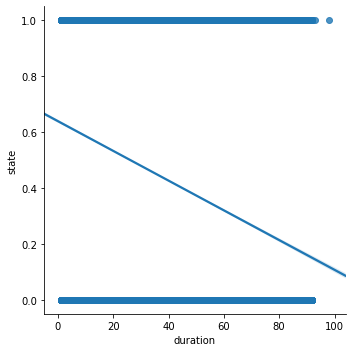

In [160]:
sns.lmplot('duration','state',data=kick_projects_ip_copy)

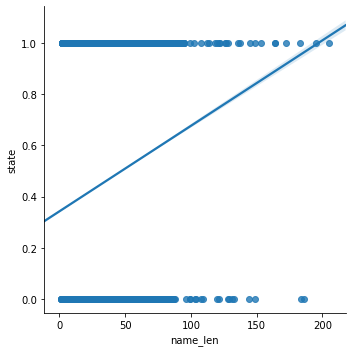

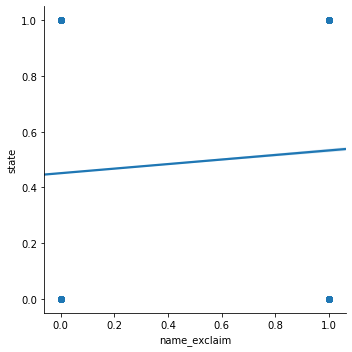

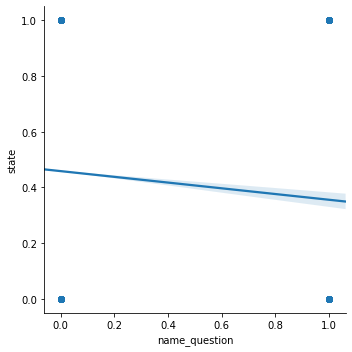

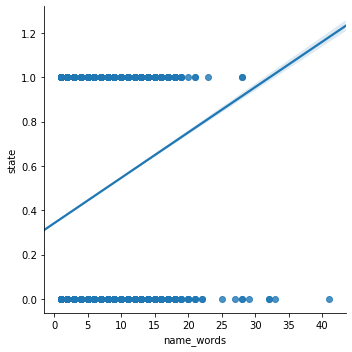

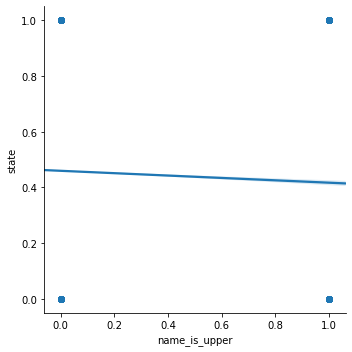

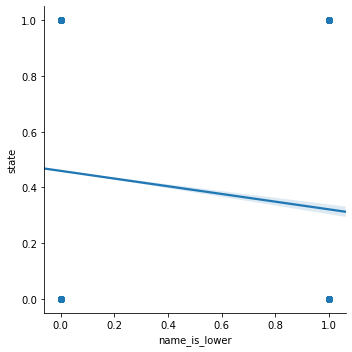

In [161]:
sns.lmplot('name_len','state',data=kick_projects_ip_copy)
sns.lmplot('name_exclaim','state',data=kick_projects_ip_copy)
sns.lmplot('name_question','state',data=kick_projects_ip_copy)
sns.lmplot('name_words','state',data=kick_projects_ip_copy)
sns.lmplot('name_is_upper','state',data=kick_projects_ip_copy)
sns.lmplot('name_is_lower','state',data=kick_projects_ip_copy)